<a href="https://colab.research.google.com/github/aslesani/pgmpy_fork/blob/master/src/default_test/imdb_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''Trains an LSTM model on the IMDB sentiment classification task.
The dataset is actually too small for LSTM to be of any advantage
compared to simpler, much faster methods such as TF-IDF + LogReg.
# Notes
- RNNs are tricky. Choice of batch size is important,
choice of loss and optimizer is critical, etc.
Some configurations won't converge.
- LSTM loss decrease patterns during training can be quite different
from what you see with CNNs/MLPs/etc.
'''
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, SimpleRNN
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt

def plot_train_val_graph(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  print('epochs:' , epochs)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()


In [0]:
def get_max_len_of_sequences(list_of_sequences):
  lengths = [len(list_of_sequences[i]) for i in range(len(list_of_sequences))]
  return max(lengths) , min(lengths) , lengths

In [0]:
def get_set_of_sensor_events(list_of_sequences):
 
  set_of_sensor_events = set()
  
  for i in range(len(list_of_sequences)):
      set_of_sensor_events = set_of_sensor_events.union(set(list_of_sequences[i]))
  
  return set_of_sensor_events, len(set_of_sensor_events)
  

In [0]:
def read_data_from_CSV_file(dest_file , data_type ,  has_header = False , return_as_pandas_data_frame = False , remove_date_and_time = False , return_header_separately = False , convert_int_columns_to_int = False):
    '''
    this function is a replacement for read_data_from_PCA_output_file and read_data_from_PCA_digitized_file
    with more capabalities.
    
    Parameters:
    ==========
    dest_file: 
    data_type: type of data that should be read  
    has_header = if the file has header, it is set to True. The header is the first line that starts whit '#' character 
    return_as_pandas_data_frame = if True, the return_value is pandas Dataframe, else numpy ndaaray
    
    convert_int_columns_to_int: if the user want to keep date and time columns, then she should 
                                specify data_type as object and then set convert_int_columns_to_int to True
    
    Returns:
    ========
    return_value: type of it is pandas Dataframe or numpy ndaaray
    
    '''
    header = ""
    with open(dest_file,'r') as dest_f:
        data_iter = csv.reader(dest_f, 
                               delimiter = ',')#quotechar = '"')
    
        if has_header:
            header = next(data_iter)
            header[0] = header[0].split('# ')[1] # remove # from first element
        
        
        data = [data for data in data_iter]
    
    if remove_date_and_time:
        data = np.delete(np.delete(data, -1, 1), -1 , 1)

    return_value= np.asarray(data, dtype = data_type)
    
    if convert_int_columns_to_int:
        rows , cols_to_convert = np.shape(return_value)
        
        if remove_date_and_time == False:
            cols_to_convert -=2
        
        for r in range(rows):
            for c in range(cols_to_convert):
                return_value[r,c] = int(return_value[r,c])
        
    
    if return_as_pandas_data_frame:
        return_value = pd.DataFrame(return_value , columns = header)
        
    if return_header_separately:
        return header , return_value
    
    else:   
        return return_value



In [78]:
!git clone https://github.com/aslesani/pgmpy_fork.git


Cloning into 'pgmpy_fork'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (100/100), done.
remote: Total 966 (delta 94), reused 147 (delta 63), pack-reused 769
Receiving objects: 100% (966/966), 558.92 KiB | 2.61 MiB/s, done.
Resolving deltas: 100% (524/524), done.


In [7]:
!git clone https://github.com/aslesani/created_dataset.git

Cloning into 'created_dataset'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 87 (delta 74), reused 87 (delta 74), pack-reused 0
Unpacking objects: 100% (87/87), done.


In [0]:
!rm -r pgmpy_fork  

In [79]:
cd pgmpy_fork/src/default_test

/content/pgmpy_fork/src/default_test


In [21]:
cd ..

/content


In [0]:
ls

In [0]:
#! cd pgmpy_fork/src/default_test
#!ls
from  read_write import read_sequence_of_bags_CSV_file_with_activity, read_sequence_based_CSV_file_with_activity
address_to_read= r"created_dataset/Seq of sensor events_based on activities/based_on_activities.csv"
list_of_data , list_of_persons , _ = read_sequence_based_CSV_file_with_activity(file_address = address_to_read, has_header = True , separate_data_based_on_persons = False, separate_words= False)


In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 122, filters='!"#$%&()*+,-./:;<=>?@[\]^`{|}~')
#list_of_data = [r'salam man', r"'M38_off' , 'M38_on'"]
tokenizer.fit_on_texts(list_of_data)
sequences = tokenizer.texts_to_sequences(list_of_data)


In [0]:
#!git clone https://github.com/pgmpy/pgmpy 
cd ..
#!ls
#!cd pgmpy/
#pip install -r requirements.txt
#!python setup.py install

In [0]:
from read_write import read_data_from_CSV_file

In [0]:
mydata = read_data_from_CSV_file(dest_file = address_to_save , data_type = int ,  has_header = False , return_as_pandas_data_frame = False , remove_date_and_time = True , return_header_separately = False , convert_int_columns_to_int = True)
    

In [0]:
sensor_events , number_of_events = get_set_of_sensor_events(sequences)
print(sensor_events)
print(number_of_events)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121}
121


In [0]:
for i in range(len(sequences)):
    print(list_of_data[i])
    print(sequences[i])
    print('_____________________________')

In [0]:
max_seq_len, min_seq_len , lens = get_max_len_of_sequences(sequences)
print(max_seq_len, min_seq_len)

2216 1


In [0]:
max_features = number_of_events
# cut texts after this number of words (among top max_features most common words)
maxlen = max_seq_len

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
#print(len(x_train), 'train sequences')
#print(len(x_test), 'test sequences')

#print('before apply pad_sequence, x_train[0]:' , x_train[0])

#80% of data for train and 20% for test
#train_numbers = 2560 #int(0.8 * len(sequences))
#x_train, y_train = sequences[0: train_numbers] , list_of_persons[0:train_numbers]
#x_test, y_test = sequences[train_numbers+1:train_numbers + 641] , list_of_persons[train_numbers+1:train_numbers + 641]

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...
17465344/17464789 [==============================] - 1s 0us/step
Pad sequences (samples x time)
x_train shape: (25000, 2216)
x_test shape: (25000, 2216)


In [0]:
print(x_train[0])
print(sequences[0])

[ 0  0  0 ... 41 31 46]
[7, 8, 7, 10, 11, 8, 11, 8, 7, 11, 8, 7, 10, 11, 8, 7, 8, 7, 10, 8, 8, 7, 33, 11, 11, 11, 8, 86, 85, 86, 85, 7, 10, 11, 11, 62, 8, 65, 7, 86, 8, 85, 7, 34, 8, 8, 8, 8, 7, 8, 7, 62, 61, 8, 65, 62, 57, 65, 66, 66, 29, 58, 9, 30, 31, 43, 41, 13, 32, 42, 46, 43, 41, 42, 46, 43, 41, 31, 46]


In [0]:
batch_size = 32

print('Build model...')
model = Sequential()
model.add(Embedding(max_features+1, 64))
model.add(SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2))#LSTM
model.add(Dense(1, activation='sigmoid'))

model.summary()

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)# i think score is loss value
print('Test accuracy:', acc)

Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          7808      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 16,129
Trainable params: 16,129
Non-trainable params: 0
_________________________________________________________________
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
24992/25000 [============================>.] - ETA: 0s - loss: 0.7059 - acc: 0.5066

In [0]:
embeddings = model.layers[0].get_weights()[0]
print(embeddings)

In [0]:
# `word_to_index` is a mapping (i.e. dict) from words to their index, e.g. `love`: 69
words_embeddings = {w:embeddings[idx] for w, idx in word_to_index.items()}

# now you can use it like this for example
print(words_embeddings['love'])  # possible output: [0.21, 0.56, ..., 0.65, 0.10]


In [0]:
print(type(score) , type(acc))

epochs: range(1, 6)


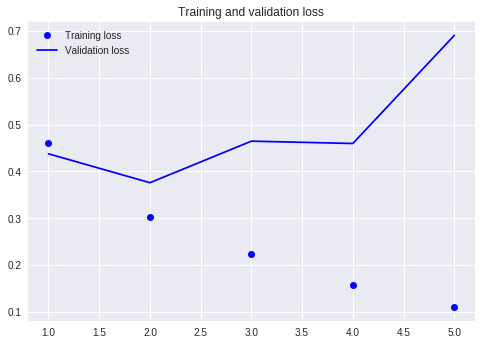

In [0]:
plot_train_val_graph(history)